In [ ]:
""" DECISION TREE"""

In [ ]:
###  1. Data Preparation

In [72]:
import pandas as pd

# Load the dataset
df = pd.read_csv("heart_disease.csv")

# Display basic information and first few records
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [ ]:
### Exploratory Data Analysis (EDA)

In [74]:
# Check missing values
print("Missing Values in each column:")
print(df.isnull().sum())


Missing Values in each column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [76]:
# View summary statistics for numerical features
print("Summary statistics:")
print(df.describe())

# Check if 'trestbps' and 'chol' have invalid zero values
print("Count of zero values in 'trestbps':", (df['trestbps'] == 0).sum())
print("Count of zero values in 'chol':", (df['chol'] == 0).sum())


Summary statistics:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

Count of zero values in 'trestbps': 1
Count of zero values in 'chol': 172


In [100]:
import pandas as pd

# Step 1: Reload dataset
df = pd.read_csv('heart_disease.csv')

# Step 2: Identify unique values BEFORE any transformation
print("Original unique values in exang:", df['exang'].unique())

# Step 3: Correct spelling mistakes
df['exang'] = df['exang'].replace({'TURE': 'TRUE'})

# Step 4: Map to boolean
df['exang'] = df['exang'].map({'FALSE': False, 'TRUE': True})

# Step 5: Verify correction
print("Unique values in exang after correction:", df['exang'].unique())
print("Missing values in exang after correction:", df['exang'].isnull().sum())


Original unique values in exang: ['FALSE' 'TRUE' 'TURE']
Unique values in exang after correction: [False  True]
Missing values in exang after correction: 0


In [80]:
# Standardize all object columns to lowercase and remove spaces
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()


In [82]:
# Replace zeros in trestbps and chol with the respective median (excluding zeros)

for col in ['trestbps', 'chol']:
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        median_val = df[df[col] != 0][col].median()
        df[col] = df[col].replace(0, median_val)
        print(f"Replaced {zero_count} zero(s) in '{col}' with median value {median_val}.")
    else:
        print(f"No zeros found in '{col}'.")


Replaced 1 zero(s) in 'trestbps' with median value 130.0.
Replaced 172 zero(s) in 'chol' with median value 240.0.


In [84]:
print("After replacement, checking min values:")
print(df[['trestbps', 'chol']].min())


After replacement, checking min values:
trestbps    80
chol        85
dtype: int64


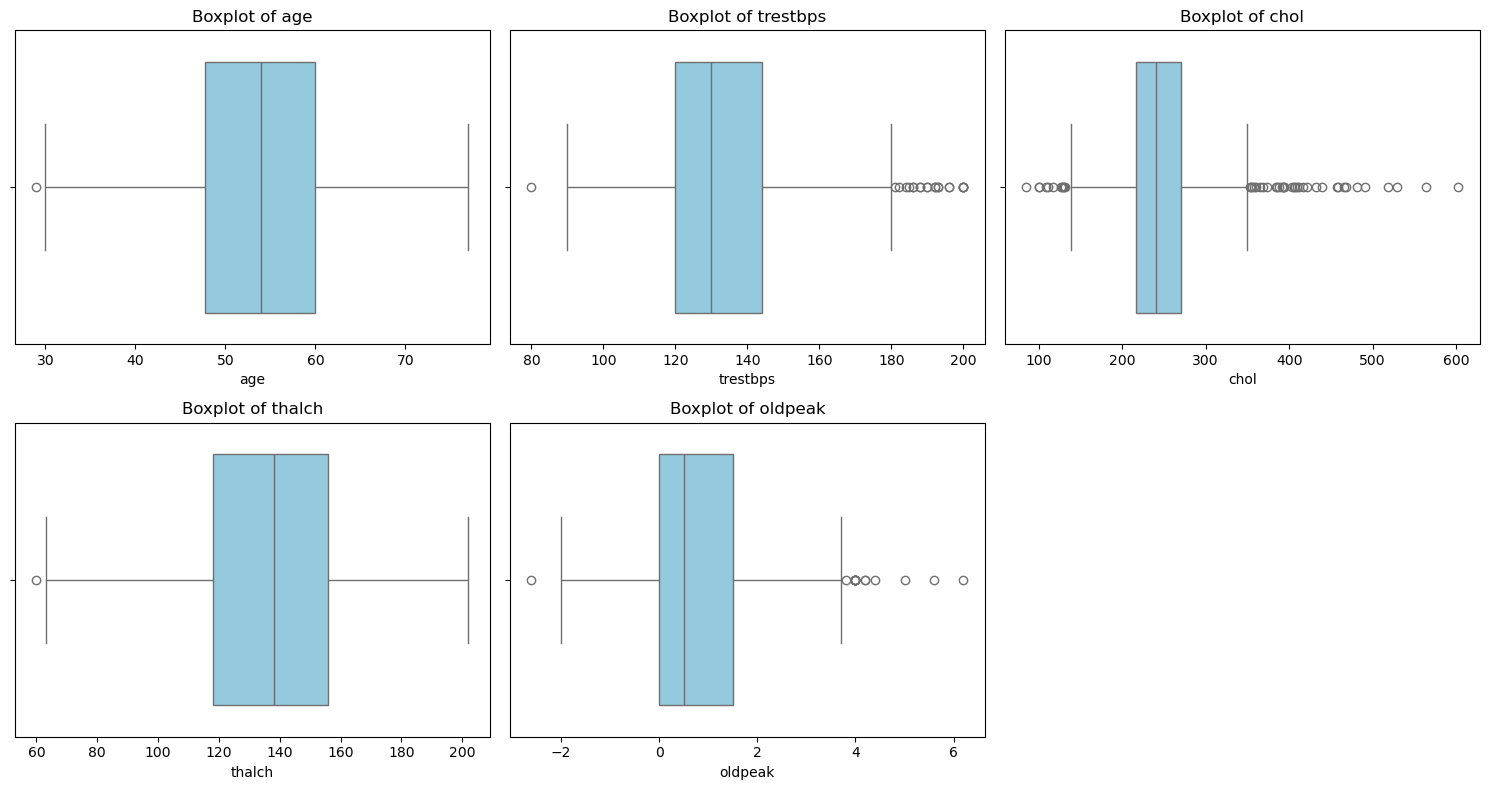

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


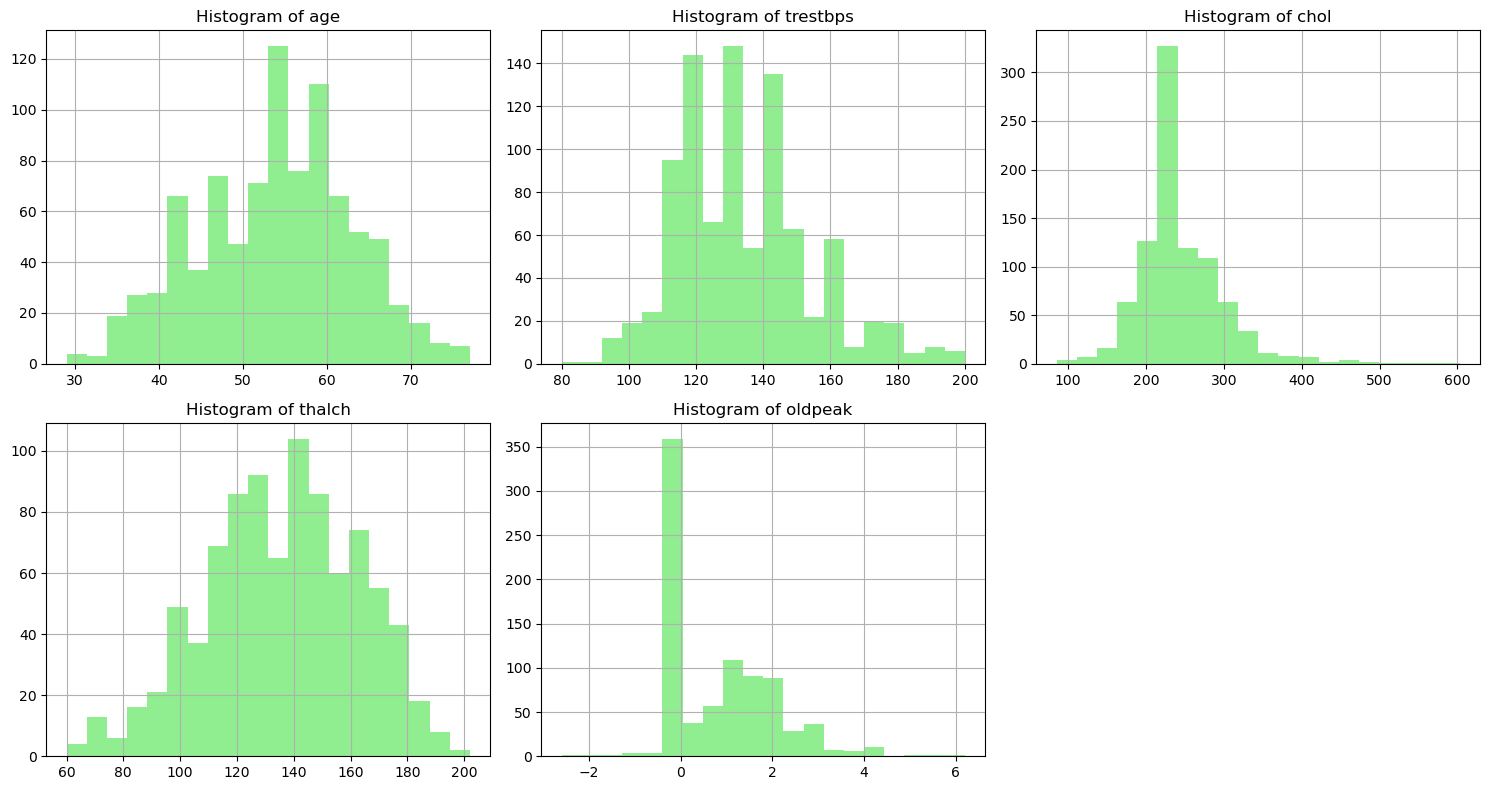

In [88]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    df[col].hist(bins=20, color='lightgreen')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


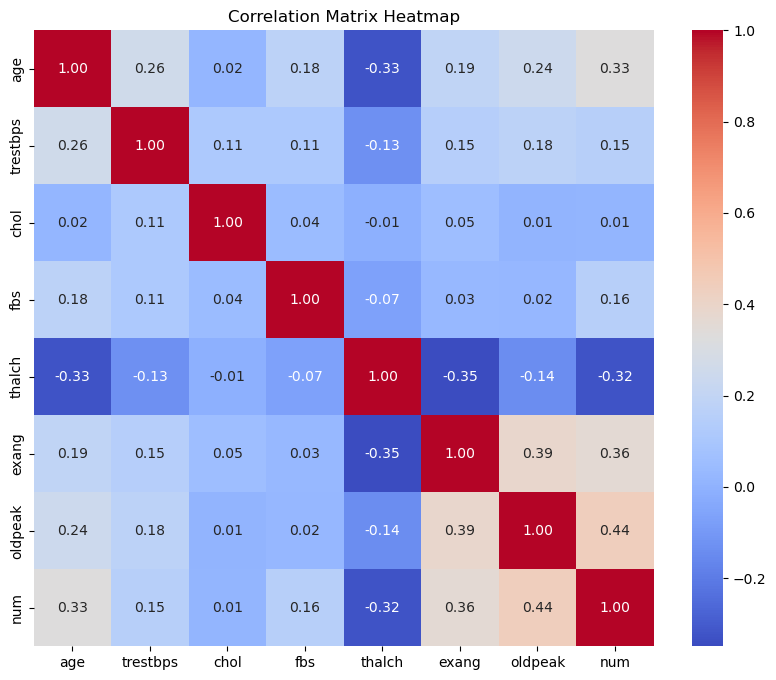

In [90]:
plt.figure(figsize=(10,8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
"""Feature Distribution
Most features like chol and trestps are right-skewed.

Correlation Matrix Insights

Moderate positive correlation:

oldpeak vs num (0.44): higher ST depression linked with heart disease.

age vs num (0.33): older age slightly increases risk.

Negative correlations:

thalch vs num (-0.32): lower max heart rate associated with disease."""





In [ ]:
### Feature Engineering

In [94]:


# 4. Cap outliers in numerical features
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for col in numerical_cols:
    cap_outliers(df, col)

# 5. Encode categorical variables
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])



# 7. Feature scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Final dataset preview
print(df.head())


        age  sex  cp  trestbps      chol  fbs  restecg    thalch exang  \
0  1.006104    1   3  0.606968 -0.249977    1        0  0.524203   NaN   
1 -1.397775    1   1  0.086693 -0.903781    0        1 -0.147763   NaN   
2  0.350500    1   0  0.346831 -1.143509    0        1  0.449540   NaN   
3 -0.195836    1   3 -0.797774 -1.274269    0        0  2.017461   NaN   
4  0.350500    1   0 -1.213994 -0.947368    0        1 -0.371752   NaN   

    oldpeak  slope  thal  num  
0  1.411045      0     0    0  
1 -0.834669      1     0    0  
2 -0.444110      1     0    0  
3 -0.834669      1     0    0  
4  0.629927      1     0    0  


In [102]:
print(df['fbs'].isnull().sum())
print(df['exang'].isnull().sum())


0
0


In [104]:
df['fbs'] = df['fbs'].astype(bool)


In [106]:
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)


In [108]:
print(df.dtypes[['fbs', 'exang']])


fbs      int32
exang    int32
dtype: object


In [ ]:
"""| Step                        | Action Taken                                               |
   | --------------------------- | ---------------------------------------------------------- |
   | Handling Missing Values     | `oldpeak` filled with median.                              |
   | Fixing Typos                | Fixed 'TURE' in `exang` and converted to boolean.          |
   | Zero Replacement            | Replaced zeros in `trestbps` and `chol` with their median. |
   | Outlier Capping             | Applied IQR-based capping on numerical columns.            |
   | Encoding                    | Label encoded categorical columns (`sex`, `cp`, etc.).     |
   | Data Type Conversion        | `fbs` and `exang` converted to integers.                   |
   | Feature Scaling             | Standardized numerical features via StandardScaler.        |"""


In [ ]:
### Decision Tree Classification

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


df = pd.read_csv('heart_disease.csv')

#  necessary preprocessing (same as before) 
# Fix exang typos and map to boolean
df['exang'] = df['exang'].replace({'TURE': 'TRUE'})
df['exang'] = df['exang'].map({'FALSE': False, 'TRUE': True})

# Fill missing oldpeak
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

# Replace zeros in trestbps and chol
for col in ['trestbps', 'chol']:
    median_val = df[df[col] != 0][col].median()
    df[col] = df[col].replace(0, median_val)

# Cap outliers (IQR method)
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for col in numerical_cols:
    cap_outliers(df, col)

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)

# Scaling numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Decision Tree Model 

# Features and target
X = df.drop('num', axis=1)
y = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)
y_proba = dt_classifier.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

#  Output 
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Classification Report:", report)


Accuracy: 0.73
Precision: 0.74
Recall: 0.71
F1 Score: 0.73
ROC AUC: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73        89
           1       0.74      0.71      0.73        93

    accuracy                           0.73       182
   macro avg       0.73      0.73      0.73       182
weighted avg       0.73      0.73      0.73       182



C:\Users\HP\AppData\Local\Temp\ipykernel_19880\790808776.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


In [ ]:
"""| Metric        | Value     |
   | ------------- | --------- |
   | Accuracy      | 73%       |
   | Precision     | 74%       |
   | Recall        | 71%       |
   | F1-Score      | 73%       |
   | ROC-AUC       | 73%       |
| Class              | Precision | Recall | F1-Score | Support |
| ------------------ | --------- | ------ | -------- | ------- |
| 0 (No Disease)     | 71%       | 74%    | 73%      | 89      |
| 1 (Disease)        | 74%       | 71%    | 73%      | 93      |
Insights
The model is balanced in predicting both classes, with similar precision and recall.

Slightly better at identifying positive cases (Disease) in terms of precision.

Overall accuracy of 73% indicates decent performance.""" 





In [ ]:
###  Hyperparameter Tuning

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Evaluate on test data
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)
y_proba = best_dt_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1 Score: {f1:.2f}")
print(f"Test ROC AUC: {roc_auc:.2f}")
print("Classification Report on Test Data:", classification_report(y_test, y_pred))


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7479641001417099
Test Accuracy: 0.79
Test Precision: 0.81
Test Recall: 0.76
Test F1 Score: 0.78
Test ROC AUC: 0.82

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        89
           1       0.81      0.76      0.78        93

    accuracy                           0.79       182
   macro avg       0.79      0.79      0.79       182
weighted avg       0.79      0.79      0.79       182



In [ ]:
"""Summary of Hyperparameter Tuning Results
After tuning the Decision Tree Classifier, the following best hyperparameters were identified:

Criterion: 'entropy' (for measuring split quality)

Max Depth: 5 (controls the depth of the tree to prevent overfitting)

Min Samples Split: 2 (minimum number of samples to split an internal node)

Model Performance on Test Data
Metric	   Value
Accuracy	79%
Precision	81%
Recall   	76%
F1-Score	78%
ROC AUC 	82%

 Classification Report by Class
Class	          Precision 	Recall	F1-Score	Support
0 (No Disease)   	77%	         81%	   79%	      89
1 (Disease)     	81%	         76%	   78%	      93

 Insights
Performance Improved: Compared to the default model, accuracy improved from 73% to 79%.

The model is now better at distinguishing between patients with and without heart disease.

A ROC AUC of 82% suggests a strong capability to discriminate between the two classes.

The balance between precision and recall is improved for both classes, ensuring fewer false positives and false negatives."""



In [ ]:
###  Model Evaluation and Analysis

In [ ]:
"""A. Model Evaluation 
our tuned Decision Tree model performance on the test set:

Metric	   Value
Accuracy	79%
Precision	81%
Recall	    76%
F1-Score	78%
ROC AUC	    82%
This shows good generalization with a balance between precision and recall.

The model can distinguish between positive (disease) and negative (no disease) cases effectively."""



In [ ]:
"""B. Visualizing the Decision Tree Structure"""

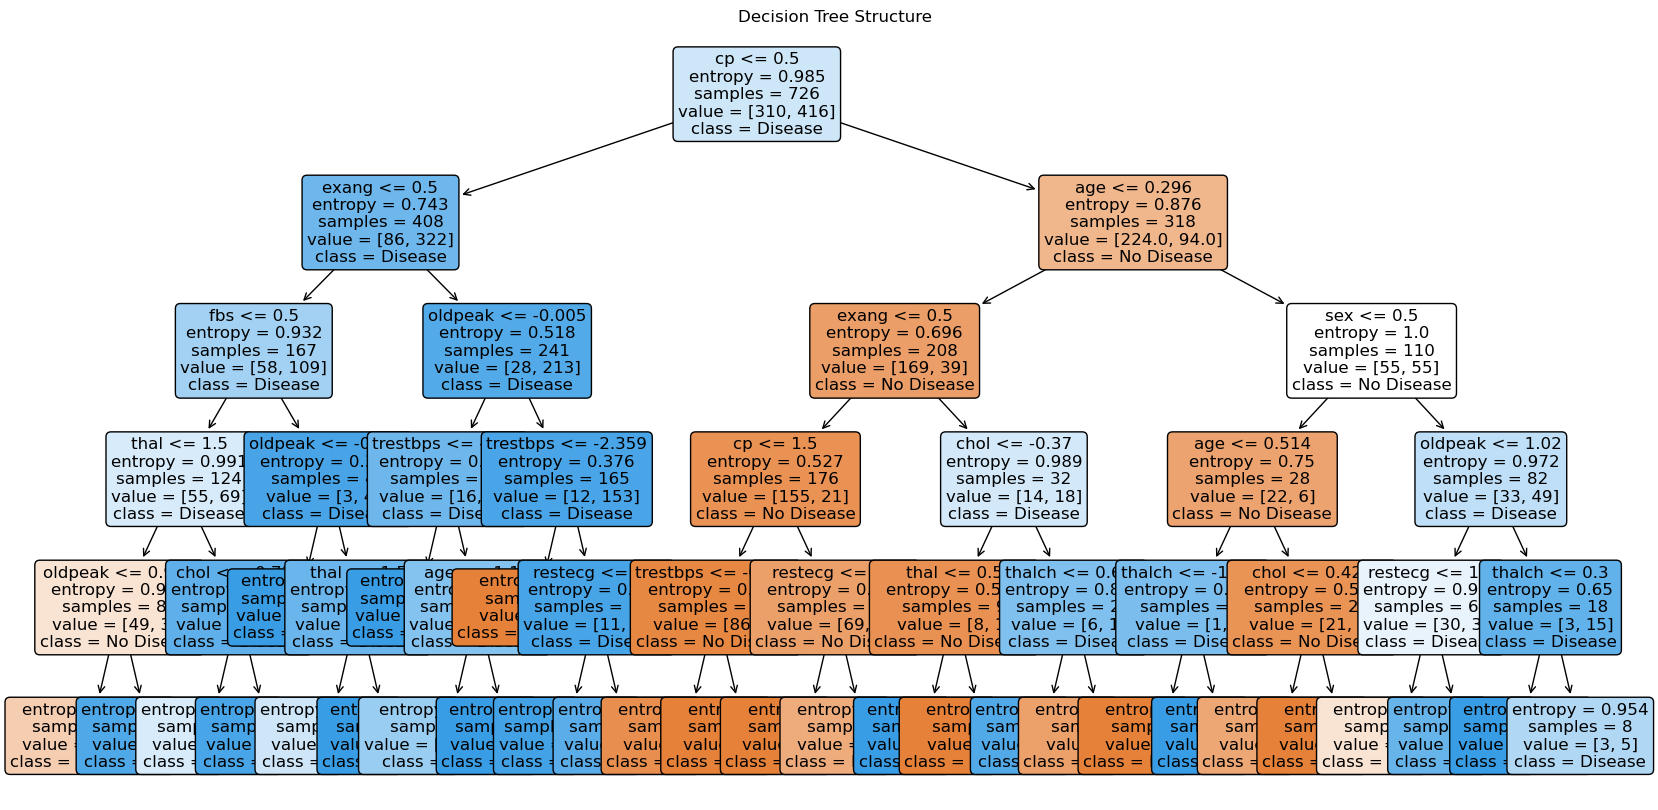

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    best_dt_model,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Structure")
plt.show()


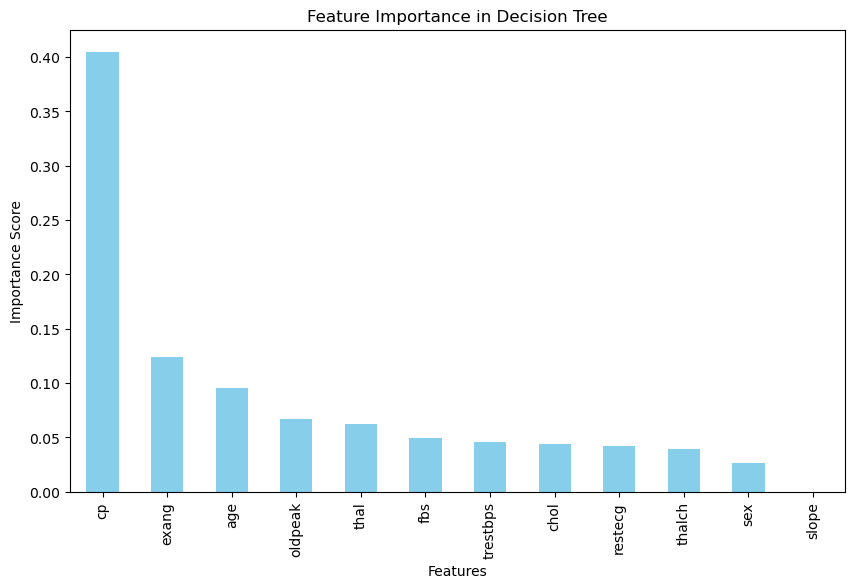

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature Importances
feature_importances = pd.Series(best_dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance in Decision Tree")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()


In [ ]:
"""Summary of Analysis
The model achieved 79% accuracy with balanced precision, recall, and a strong ROC AUC of 82%.

 Decision Tree Visualization:

Provides interpretability of the decision-making process.

Shows key splits and thresholds used to classify the data.

 Feature Importance:

Highlights which features the model prioritized in making predictions.

 cp, exang, age the most influential health indicators affecting heart disease prediction."""



In [ ]:
### Interview Questions

In [ ]:
"""1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
| Hyperparameter      | Description                                            | Effect on Model Performance                                                                 |
| ------------------- | ------------------------------------------------------ | ------------------------------------------------------------------------------------------- |
| `max_depth`         | Limits the maximum depth of the tree.                  | Prevents overfitting by restricting tree growth; smaller depth = less complex model.        |
| `min_samples_split` | Minimum number of samples required to split a node.    | Higher values reduce model complexity, preventing overfitting.                              |
| `min_samples_leaf`  | Minimum samples required at a leaf node.               | Helps in smoothing the model and reducing overfitting.                                      |
| `criterion`         | Function to measure split quality (`gini`, `entropy`). | Impacts how the tree splits data (e.g., Gini is faster, Entropy is more information-based). |
| `max_features`      | Number of features to consider when splitting.         | Controls randomness and can help reduce overfitting.                                        |
| `max_leaf_nodes`    | Maximum number of leaf nodes.                          | Limits the number of end nodes to prevent over-complex trees.                               |

Tuning these hyperparameters controls overfitting vs underfitting and improves generalization on unseen data.

2. What is the difference between Label Encoding and One-Hot Encoding?
| Aspect                      | Label Encoding                                                                       | One-Hot Encoding                                         |
| --------------------------- | ------------------------------------------------------------------------------------ | -------------------------------------------------------- |
| Definition                  | Assigns a unique integer to each category.                                           | Creates binary columns for each category (0/1).          |
| Output Example              | `Red=0`, `Blue=1`, `Green=2`                                                         | Three columns: `Red`, `Blue`, `Green` with 0/1 flags.    |
| When to Use                 | When categories are ordinal (have an order).                                         | When categories are nominal (no order).                  |
| Risk                        | Introduces artificial order where there is none, misleading for some algorithms.     | Avoids artificial ordering but increases dimensionality. |
| Algorithm Compatibility     | Works for tree-based models; may mislead linear models.                              | Preferred for linear models (e.g., Logistic Regression). |"""
   